# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TheRepublic.txt to TheRepublic.txt


In [3]:
# Dataset used is an excerpt from TheRepublic
# Use open function to open the text file, "r" means the file is for reading only
data = open("TheRepublic.txt", "r")
data = data.read()

In [4]:
print('length of text:', len(data))

length of text: 100209


# Data Preprocessing

In [5]:
# Lowercase the text
text = data.lower()

# Tokenization

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Initialize tokenizer
tokenizer = Tokenizer()

# Put the text in a list so that the tokenizer tokenizes words and not single letters
tokens = tokenizer.fit_on_texts([text])

In [8]:
# Tokenized words with their indeces
tokenizer.word_index

{'the': 1,
 'of': 2,
 'and': 3,
 'to': 4,
 'is': 5,
 'in': 6,
 'a': 7,
 'or': 8,
 'which': 9,
 'he': 10,
 'be': 11,
 'that': 12,
 'not': 13,
 'by': 14,
 'are': 15,
 'as': 16,
 'his': 17,
 'but': 18,
 'for': 19,
 'have': 20,
 'with': 21,
 'at': 22,
 'has': 23,
 'justice': 24,
 'we': 25,
 'they': 26,
 "'": 27,
 'this': 28,
 'will': 29,
 'who': 30,
 'socrates': 31,
 'more': 32,
 'only': 33,
 'their': 34,
 'plato': 35,
 'state': 36,
 'an': 37,
 'them': 38,
 'from': 39,
 'on': 40,
 'all': 41,
 'may': 42,
 'him': 43,
 'good': 44,
 'was': 45,
 'first': 46,
 'than': 47,
 'been': 48,
 'one': 49,
 'man': 50,
 'there': 51,
 'into': 52,
 'other': 53,
 'any': 54,
 'what': 55,
 'when': 56,
 'must': 57,
 'you': 58,
 'men': 59,
 'life': 60,
 'such': 61,
 'no': 62,
 'like': 63,
 'glaucon': 64,
 'just': 65,
 'evil': 66,
 'would': 67,
 'thrasymachus': 68,
 'i': 69,
 'republic': 70,
 'do': 71,
 'our': 72,
 'another': 73,
 'then': 74,
 'were': 75,
 'some': 76,
 'nor': 77,
 'if': 78,
 'world': 79,
 'also': 

In [9]:
# Set the vocab size
vocab_size = len(tokenizer.word_index) + 1
vocab_size

3216

In [10]:
sequences = [] # List for storing sequences

# Iterrate through every line in text file
for line in text.split('\n'):

    # Create sequences by passing the text line into text_to_sequences function
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram = token_list[:i+1]
        # Store the n_gram sequence into the sequences list
        sequences.append(n_gram)

In [11]:
# Set max lenght
max_len = max([len(seq) for seq in sequences])

In [12]:
# Pad sequences using pre padding
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
sequences = np.array(sequences)

In [13]:
X = sequences[:, :-1]
y = sequences[:, -1]

In [14]:
X

array([[   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    0,   14],
       [   0,    0,    0, ...,    0,    0, 1340],
       ...,
       [   0,    0,    0, ...,    1, 3214,   29],
       [   0,    0,    0, ..., 3214,   29,  622],
       [   0,    0,    0, ...,   29,  622, 3215]], dtype=int32)

In [15]:
y

array([  70,   35,   14, ...,  622, 3215,   37], dtype=int32)

In [16]:
from keras.utils import to_categorical

y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)
y = np.array(y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [18]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=max_len-1))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 17, 100)           321600    
                                                                 
 lstm (LSTM)                 (None, 17, 100)           80400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 3216)              324816    
                                                                 
Total params: 817,316
Trainable params: 817,316
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(X, y, batch_size=32, epochs=200).history

Epoch 1/200
512/512 [==============================] - 40s 64ms/step - loss: 6.3263 - accuracy: 0.0873
Epoch 2/200
512/512 [==============================] - 33s 65ms/step - loss: 5.8339 - accuracy: 0.1185
Epoch 3/200
512/512 [==============================] - 33s 64ms/step - loss: 5.6077 - accuracy: 0.1287
Epoch 4/200
512/512 [==============================] - 31s 61ms/step - loss: 5.4574 - accuracy: 0.1378
Epoch 5/200
512/512 [==============================] - 43s 84ms/step - loss: 5.3340 - accuracy: 0.1468
Epoch 6/200
512/512 [==============================] - 47s 92ms/step - loss: 5.2212 - accuracy: 0.1561
Epoch 7/200
512/512 [==============================] - 45s 87ms/step - loss: 5.1086 - accuracy: 0.1675
Epoch 8/200
512/512 [==============================] - 48s 93ms/step - loss: 4.9988 - accuracy: 0.1729
Epoch 9/200
512/512 [==============================] - 35s 69ms/step - loss: 4.9024 - accuracy: 0.1790
Epoch 10/200
512/512 [==============================] - 41s 80ms/step - l

# Evaluation metrics

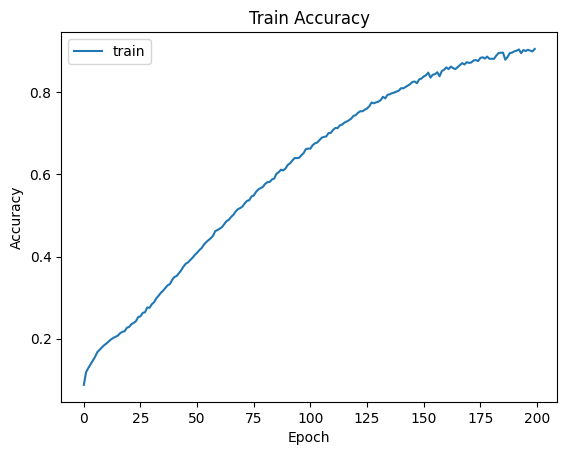

In [20]:
# plot training loss
plt.plot(history['accuracy'])
plt.title('Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train'])
plt.show()

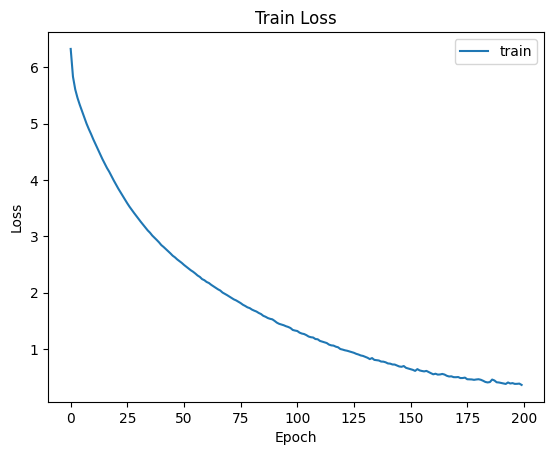

In [21]:
# plot training  loss
plt.plot(history['loss'])
plt.title('Train Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train'])
plt.show()

In [56]:
# Function for predicting next words
# Function takes in current word and number of words to be predicted
def prediction(word, num_words):

  for _ in range(num_words):

    # Fit tokenizer on input word
    tokens = tokenizer.texts_to_sequences([word])[0]

    # Pad the tokens to be of the same length as the longest sequence we set previously
    tokens = pad_sequences([tokens], maxlen=max_len-1, padding='pre')

    # Input the padded tokens into the model for prediction
    # np.argmax() is so that the predicted word is the word with highest probabilty of occurance
    pred = np.argmax(model.predict(tokens), axis=-1)

    # Store next word in a string
    next_word = ""

    # Check if the index of the predicted word is the same as it's index in tokens
    for wrd, index in tokenizer.word_index.items():
        if index == pred:
            next_word = wrd
            break
    # Add the next word to the current word
    word += " " + next_word
    print(word)


In [57]:
word = "republic" # The text we input into the model for next words prediction
num_words = 1 # Number of words to be predicted

print(prediction(word, num_words))

1/1 [==============================] - 0s 34ms/step
republic division
None


In [58]:
word = "republic" # The text we input into the model for next words prediction
num_words = 2 # Number of words to be predicted

print(prediction(word, num_words))

1/1 [==============================] - 0s 28ms/step
republic division
1/1 [==============================] - 0s 28ms/step
republic division of
None


In [59]:
word = "republic" # The text we input into the model for next words prediction
num_words = 5 # Number of words to be predicted

prediction(word, num_words)

1/1 [==============================] - 0s 37ms/step
republic division
1/1 [==============================] - 0s 32ms/step
republic division of
1/1 [==============================] - 0s 31ms/step
republic division of labour
1/1 [==============================] - 0s 42ms/step
republic division of labour the
1/1 [==============================] - 0s 35ms/step
republic division of labour the last


In [44]:
word = "it was" # The text we input into the model for next words prediction
num_words = 1 # Number of words to be predicted

prediction(word, num_words)

1/1 [==============================] - 0s 28ms/step
it was again


In [45]:
word = "it was" # The text we input into the model for next words prediction
num_words = 2 # Number of words to be predicted

prediction(word, num_words)

1/1 [==============================] - 0s 33ms/step
it was again
1/1 [==============================] - 0s 32ms/step
it was again die


In [46]:
word = "it was" # The text we input into the model for next words prediction
num_words = 5 # Number of words to be predicted

prediction(word, num_words)

1/1 [==============================] - 0s 44ms/step
it was again
1/1 [==============================] - 0s 49ms/step
it was again die
1/1 [==============================] - 0s 48ms/step
it was again die and
1/1 [==============================] - 0s 49ms/step
it was again die and is
1/1 [==============================] - 0s 89ms/step
it was again die and is used


In [47]:
word = "important" # The text we input into the model for next words prediction
num_words = 1 # Number of words to be predicted

prediction(word, num_words)

1/1 [==============================] - 0s 32ms/step
important that


In [48]:
word = "important" # The text we input into the model for next words prediction
num_words = 2 # Number of words to be predicted

prediction(word, num_words)

1/1 [==============================] - 0s 38ms/step
important that
1/1 [==============================] - 0s 26ms/step
important that the


In [49]:
word = "important" # The text we input into the model for next words prediction
num_words = 5 # Number of words to be predicted

prediction(word, num_words)

1/1 [==============================] - 0s 32ms/step
important that
1/1 [==============================] - 0s 34ms/step
important that the
1/1 [==============================] - 0s 25ms/step
important that the unjust
1/1 [==============================] - 0s 28ms/step
important that the unjust life
1/1 [==============================] - 0s 28ms/step
important that the unjust life is
